In [181]:
#importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [182]:
#adding titles/columns to the dataset

# MYCT = Machine Cycle Time in nanosec
# MMIN = Minimum Main Memory in kilobytes
# MMAX = Maximum Main Memory in kilobytes
# CACH = Caatche Memory in kilobytes
# CHMIN = Minimum Channels in units
# CHMAX = Maximum Channels in units
# PRP = Published Relative Performance
# ERP = Estimated Relative Performance

titles = ['vendor_name','model_name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

model = pd.read_csv('machine.csv', names=titles)

In [183]:
#showing the first 5 rows of the dataset

model.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [184]:
#lists out the dataset columns

model.columns

Index(['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

In [185]:
#statistical summary of the dataset

model.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [186]:
#to view the numbers of rows and columns

model.shape

(209, 10)

In [187]:
#gettimg the data types of each attributes in the dataset

model.dtypes

vendor_name    object
model_name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

In [188]:
model.corr(method='pearson')

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


In [189]:
model.drop(['PRP','model_name'], axis=1, inplace=True)

In [190]:
model.columns

Index(['vendor_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP'], dtype='object')

In [191]:
y = model['ERP']

In [192]:
y.shape

(209,)

In [193]:
x1 = model.drop(['ERP','vendor_name'], axis=1)

In [194]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [195]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     344.1
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          3.92e-103
Time:                        10:53:37   Log-Likelihood:                -1097.2
No. Observations:                 209   AIC:                             2208.
Df Residuals:                     202   BIC:                             2232.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4814      6.288    -10.574      0.000     -78.879     -54.084
MYCT           0.0660      0.014      4.818      0.000       0.039       0.093
MMIN           0.0143      0.001     10.021      0.000       0.011       0.017
MMAX           0.0066      0.001     13.138      0.000       0.006       0.008
CACH           0.4945      0.109      4.533      0.000       0.279       0.710
CHMIN         -0.1723      0.669     -0.258      0.797      -1.491       1.146
CHMAX          1.2012      0.172      6.985      0.000       0.862       1.540
==============================================================================
Omnibus:                      109.550   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1015.951
Skew:                           1.786   Prob(JB):                    2.45e-221
Kurtosis:                      13.193   Cond. No.                     3.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

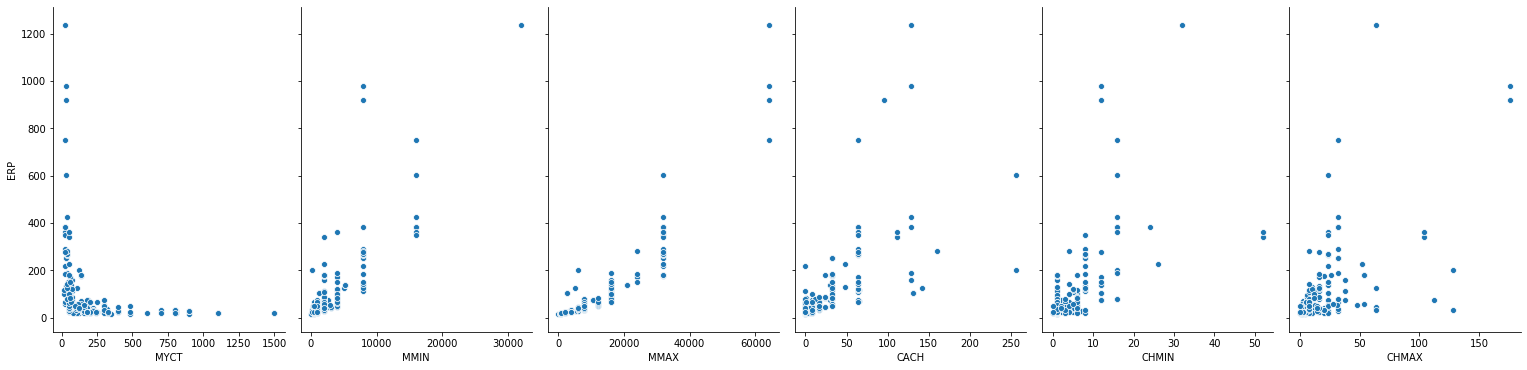

In [196]:
sns.pairplot(model, x_vars=['MYCT','MMIN','MMAX','CACH', 'CHMIN','CHMAX'], y_vars='ERP', height=5, aspect=0.7)

In [197]:
x = x.to_numpy()

In [198]:
y = y.to_numpy()

In [200]:
#creating the model

reg = LinearRegression()

In [97]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [98]:
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [201]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
print(reg.intercept_)

-66.4813843220309


In [203]:
print(reg.coef_)

[ 0.          0.06596107  0.01430707  0.00659013  0.49446814 -0.17233733
  1.20116913]


In [204]:
y_new = reg.predict(x)

In [205]:
y_new

array([ 2.62543224e+02,  3.13653833e+02,  3.13653833e+02,  3.13653833e+02,
        1.88993073e+02,  3.29278930e+02,  4.42158894e+02,  4.42158894e+02,
        6.53043000e+02,  9.49282068e+02, -3.78950304e+00, -6.93739098e-01,
        6.03888876e+01,  1.41064440e+02, -3.74252508e+01,  9.72261641e+01,
       -1.35047929e+01,  2.04579597e+01, -1.12046074e+01,  1.90970917e+02,
        4.35051846e+01,  5.13234513e+01,  9.25569010e+01,  1.01825840e+02,
        1.02399243e+01, -1.94593244e+01,  4.86421426e+00, -1.65318055e+01,
        2.71339883e+00,  2.51958495e-01,  6.27113755e+01,  6.27113755e+01,
        8.49597879e+01,  8.49597879e+01,  1.91970519e+02,  1.92498208e+02,
       -3.42614559e+01, -1.27264960e+01,  2.79410855e+01, -1.30711706e+01,
        1.32893427e+01,  8.03174375e+01,  8.15186066e+01,  8.15186066e+01,
        5.40272766e+01,  2.76667633e+01,  2.63102223e+00,  3.52336223e+01,
        2.24837838e+01,  2.01498356e+01,  3.89351358e+01, -2.43693888e+00,
        7.38449469e+01,  

In [206]:
reg.score(x,y)

0.9108693747168687